![](tec.png)



## **Análisis de Datos Masivos**
## Clasificación del árbol de decisiones
## **Nombre del docente**
### José Gabriel Rodriguez Rivas
## **Nombre del alumno**
### Najib Alejandro Loera Rodriguez


**En esta práctica de laboratorio utilizará un modelo clasificador de árbol de decisiones para determinar quiénes sobrevivieron al desastre del crucero Titanic**

**Parte 1: Crear un clasificador de árbol de decisiones**

**Parte 2: Aplicar el modelo del árbol de decisiones**

**Parte 3: Evaluar el modelo del árbol de decisiones**

### Parte 1: Crear un clasificador de árbol de decisiones

En esta práctica de laboratorio creará un clasificador de árbol de decisiones que captará información de un conjunto de datos rotulado.

El conjunto de datos contiene los nombres y los datos demográficos de todos los pasajeros. Además, se incluyen los detalles de viaje de los pasajeros. De estos datos, podemos crear un árbol de decisiones que ilustre los factores que contribuyeron a la supervivencia, o a la falta de ella, en el viaje.






Con los datos de arriba, ¿qué tipos de preguntas podemos hacer acerca de los factores que contribuyeron a que los pasajeros sobrevivan o fallecieran en la catástrofe del Titanic?

**Respuesta:** Cual es el nombre del pasajero , Que genero es masculino o femenino? , Que edad tiene? , Tiene hermanos y de ser verdadero cuantos? 

### Paso 1: Crear la estructura de datos

In [2]:
# Importar librerias
import pandas as pd

# Crear un dataframe que contenga el csv
training = pd.read_csv("titanic-train.csv")

##### b) Verifique la importación y analice los datos

In [3]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 12 columns):
PassengerId    915 non-null int64
Survived       915 non-null int64
Pclass         915 non-null int64
Name           915 non-null object
Gender         915 non-null object
Age            738 non-null float64
SibSp          915 non-null int64
Parch          915 non-null int64
Ticket         915 non-null object
Fare           915 non-null float64
Cabin          202 non-null object
Embarked       914 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 85.9+ KB


¿Faltan valores en el conjunto de datos?

**Respuesta:** Algunas de las edades que estan en NaN

In [4]:
training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",male,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S


### Paso 2: Preparar los datos para el modelo de árbol de decisiones

**a) Reemplace los datos de la cadena por etiquetas numéricas**

Utilizaremos scikit-learn para crear árboles de decisiones. El modelo del árbol de decisiones que utilizaremos solo puede administrar datos numéricos. Los valores para la variable Gender (Género) se deben transformarse en representaciones numéricas. 0 se utilizará para representar el valor "masculino" y 1 para el valor "femenino".

En este código, se utiliza una expresión lambda con el método de estructura de datos apply(). Esta expresión lambda representa una característica que utiliza una instrucción condicional para reemplazar los valores de texto de las columnas por el valor numérico correspondiente. La instrucción de la lambda se puede interpretar de la siguiente manera: "Si el parámetro toLabel es ‘male’, colocar 0; si el valor es otro, colocar 1". El método apply() ejecutará esta función en los valores de cada fila de la columna "Gender" de la estructura de datos

In [5]:
# Si el parámetro toLabel es ‘male’, colocar 0;
# si el valor es otro, colocar 1

training["Gender"] = training["Gender"].apply(lambda toLabel: 
                            0 if toLabel == 'male' else 1)




**b) Verifique que la variable Gender haya cambiado**

El resultado debe mostrar valores de 0 o 1 para la variable Gender en el conjunto de datos.


In [6]:
training.head(10)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",0,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.0,0,0,7553,9.8375,NaN,S
5,6,0,2,"Bowenur, Mr. Solomon",0,42.0,0,0,211535,13.0000,NaN,S
6,7,0,3,"Bowen, Mr. David John ""Dai""",0,21.0,0,0,54636,16.1000,NaN,S
7,8,0,3,"Assam, Mr. Ali",0,23.0,0,0,SOTON/O.Q. 3101309,7.0500,NaN,S
8,9,0,3,"Thomas, Mr. John",0,NaN,0,0,2681,6.4375,NaN,C
9,10,0,3,"Moran, Mr. Daniel J",0,NaN,1,0,371110,24.1500,NaN,Q


#### C) Aborde la ausencia de valores en el conjunto de datos

El resultado del método info() que mencionamos más arriba indicó que aproximadamente 180 observaciones no tienen el valor de la edad. El valor de la edad es importante para nuestro análisis. Debemos abordar estos valores faltantes de alguna manera. Si bien no es lo ideal, podemos reemplazar estos valores de edad faltantes por el promedio de edad para todo el conjunto de datos.

Esto se logra mediante la aplicación del método fillna() en la columna "Age" ("Edad") del conjunto de datos. El método fillna() cambiará la estructura de datos original mediante el argumento inplace = True.

In [7]:
#code cell 6
training["Age"].fillna(training["Age"].mean(), inplace=True)

**d) Verifique que se hayan reemplazado los valores**

In [8]:
training.head(10)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.000000,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.000000,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",0,29.970867,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.000000,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.000000,0,0,7553,9.8375,NaN,S
5,6,0,2,"Bowenur, Mr. Solomon",0,42.000000,0,0,211535,13.0000,NaN,S
6,7,0,3,"Bowen, Mr. David John ""Dai""",0,21.000000,0,0,54636,16.1000,NaN,S
7,8,0,3,"Assam, Mr. Ali",0,23.000000,0,0,SOTON/O.Q. 3101309,7.0500,NaN,S
8,9,0,3,"Thomas, Mr. John",0,29.970867,0,0,2681,6.4375,NaN,C
9,10,0,3,"Moran, Mr. Daniel J",0,29.970867,1,0,371110,24.1500,NaN,Q




¿Cuál es el valor que se utilizó para reemplazar a las edades faltantes?


**Respuesta:** el valor es 29.97086729

**Paso 3: Entrenar y calificar el modelo del árbol de decisiones**

**a) Cree un objeto de arreglo con la variable que será el objetivo del modelo**

El propósito del modelo es clasificar a los pasajeros como sobrevivientes o víctimas fatales. El conjunto de datos identifica sobrevivientes y víctimas fatales. El modelo deducirá qué valores variables de entrada tienen más probabilidad de pertenecer a las víctimas fatales y a los sobrevivientes. Luego, usted podrá utilizar dicha información para clasificar pasajeros de un conjunto de datos único de prueba

In [9]:
#code cell 8
#create the array for the target values
y_target = training["Survived"].values



**b) Cree el arreglo de valores que será la entrada para el modelo**

Solo algunas de las funciones de datos son útiles para crear el árbol clasificador. Creamos una lista de las columnas a partir de los datos que deseamos que el clasificador utilice como variables de entrada y luego creamos un arreglo con el nombre de la columna de esa variable. La variable X_input contiene los valores para todas las funciones que utilizará el modelo para deducir cómo hacer las clasificaciones. Una vez que el modelo esté entrenado, utilizaremos esta variable para asignar estas etiquetas al conjunto de datos de prueba.

In [10]:
#code cell 9
columns = ["Fare", "Pclass", "Gender", "Age", "SibSp"]
#create the variable to hold the features that the classifier will use
X_input = training[list(columns)].values

In [11]:
clasificacion = ['SOBREVIVE', 'NO SOBREVIVE']

**c) Crear el modelo programado**

Importe el módulo del árbol de decisiones desde la biblioteca de aprendizaje automático sklearn. Cree el objeto clasificador clf_train. A continuación, utilice el método fit() del objeto clasificador con la variables X_input e y_target como parámetros para entrenar el modelo.

In [12]:
#code cell 10
#import the tree module from the sklearn library
from sklearn import tree

#create clf_train as a decision tree classifier object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#train the model using the fit() method of the decision tree object. 
#Supply the method with the input variable X_input and the target variable y_target
clf_train = clf_train.fit(X_input, y_target)



**d) Evalúe el modelo**

Utilice el método score() del objeto del árbol de decisiones para mostrar la precisión del porcentaje de las asignaciones realizadas por el clasificador. Este método considera las variables de entrada y salida como argumentos.

In [13]:


#code cell 11
clf_train.score(X_input,y_target)



0.8163934426229508

Este valor de calificación indica que las calificaciones realizadas por el modelo deberían ser correctas aproximadamente el 82 % de las veces.


**Paso 6: Visualizar el árbol**

**a) Cree el resultado del archivo intermedio**

Importe el módulo sklearn.externals.six StringIO que se utiliza para generar las características del árbol de decisiones en un archivo. Crearemos un archivo dot de Graphviz que nos permitirá exportar los resultados del clasificador en un formato que se puede convertir en gráfico.

In [14]:
#code cell 12
from sklearn.externals.six import StringIO
with open("titanic.dot", 'w') as f:
    f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns,class_names = clasificacion)



C:\Users\Blue\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


El archivo dot que se creó anteriormente se puede convertir en un archivo .png con el procesador dot de Graphiz. Este es un comando shell, así que utilice ! antes de él para ejecutarlo desde esta libreta de anotaciones. El nuevo archivo de imagen titanic.png deberá aparecer en el directorio que contiene esta libreta de anotaciones.

In [15]:
#code cell 13
#run the Graphviz dot command to convert the .dot file to .png
!dot -Tpng / titanic.dot -o /titanic2.png



Error: dot: can't open /
Error: Could not open "/titanic2.png" for writing : Permission denied


#### Mostrar vista del arbol

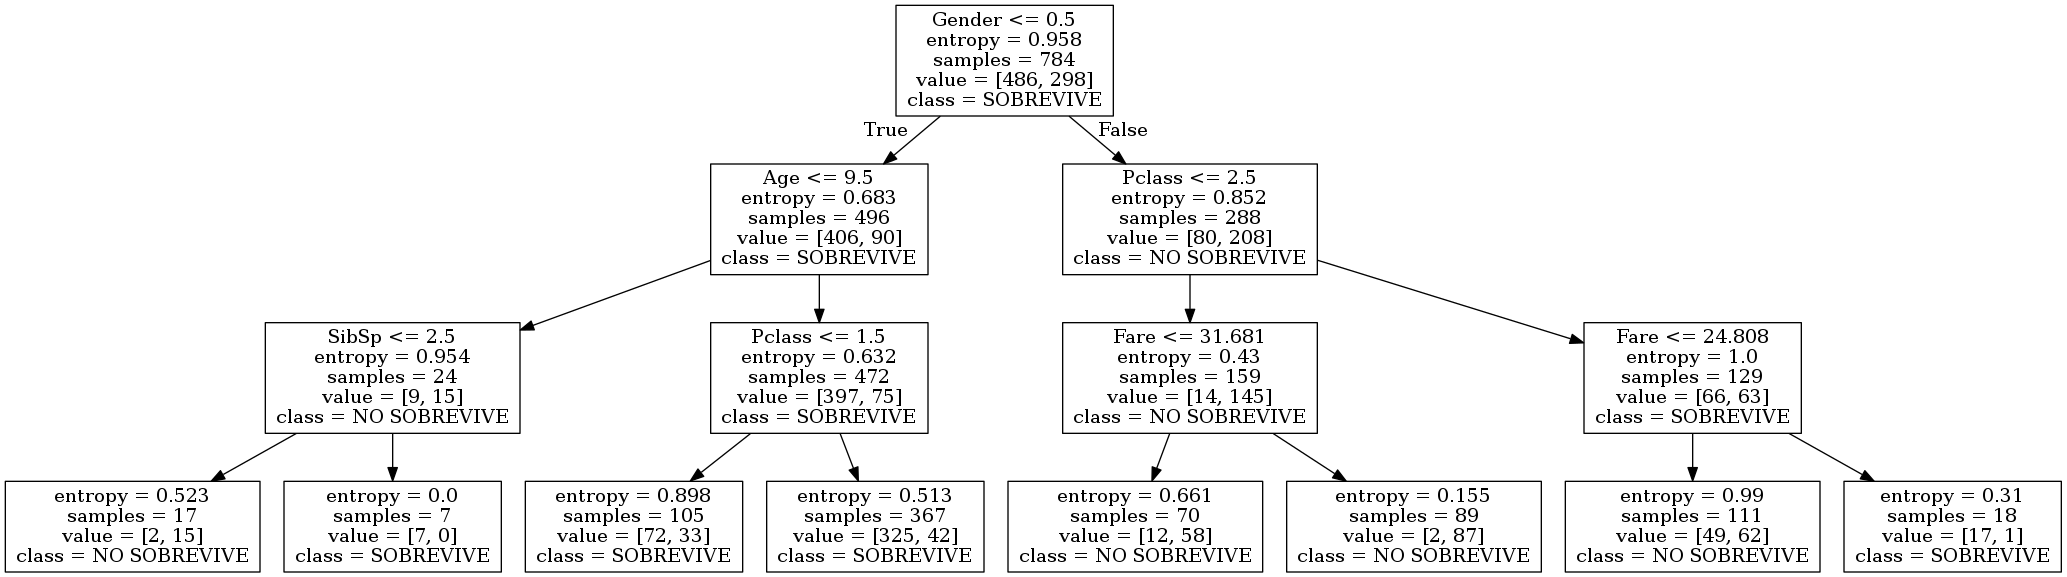

In [16]:
from IPython.display import Image

Image('titanic.png')

In [17]:
import graphviz 
dot_data = tree.export_graphviz (clf_train, out_file=None,
                               class_names = clasificacion,
                               feature_names = columns,
                               filled= True, rounded= True,
                               special_characters= True)
graph = graphviz.Source(dot_data)
graph.render("TITANICCOLOR", format='png')

'TITANICCOLOR.png'

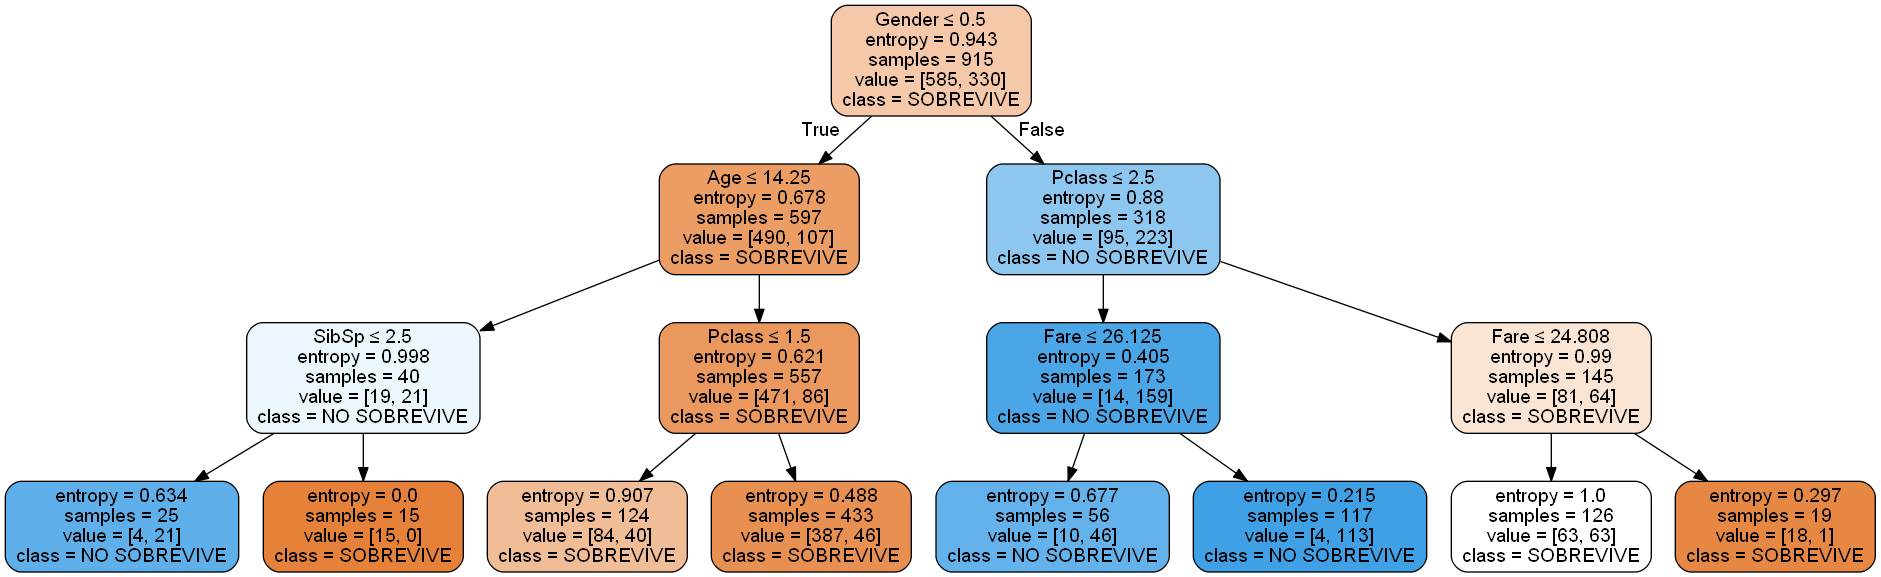

In [18]:
from IPython.display import Image

Image('TITANICCOLOR.png')

¿Qué describe al grupo que tenía mayor cantidad de víctimas fatales? ¿Qué grupo tenía la mayor cantidad de sobrevivientes?

**Respuesta:** El genero y la edad es la que influye para la supervivencia, las mujeres tienen el mayor numero de sobrevivientes

### Parte 2: Aplicar el modelo del árbol de decisiones

En esta parte de la práctica de laboratorio, usaremos los resultados del modelo del árbol de decisiones programado para etiquetar un conjunto de datos sin etiquetas de pasajeros del Titanic. El árbol de decisiones evaluará las características de cada observación y etiquetará la observación como sobreviviente (etiqueta = 1) o víctima fatal (etiqueta = 0).

In [19]:
#importar datos
testing = pd.read_csv("titanic-test.csv")



In [20]:
testing.count()

PassengerId    393
Survived       393
Pclass         393
Name           393
Gender         393
Age            307
SibSp          393
Parch          393
Ticket         393
Fare           393
Cabin           93
Embarked       392
dtype: int64



¿Cuántos registros hay en el conjunto de datos?

**Respuesta:** 393

In [21]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 12 columns):
PassengerId    393 non-null int64
Survived       393 non-null int64
Pclass         393 non-null int64
Name           393 non-null object
Gender         393 non-null object
Age            307 non-null float64
SibSp          393 non-null int64
Parch          393 non-null int64
Ticket         393 non-null object
Fare           393 non-null float64
Cabin          93 non-null object
Embarked       392 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 37.0+ KB


¿Qué variable(s) importante(s) son valores faltantes y cuántas faltan

**Respuesta:** Faltan algunos valores de edad que estan en NaN y las cabinas que tambien en estan algunas en NaN

b) Utilice una expresión lambda para reemplazar los valores “male” y “female” por 0 para masculino y 1 para femenino.¶

In [22]:


#code cell 16
#replace the Gender labels in the testing dataframe
testing["Gender"] = testing["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)



In [23]:
testing.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,916,0,2,"Coleridge, Mr. Reginald Charles",0,29.0,0,0,W./C. 14263,10.50,NaN,S
1,917,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",1,40.0,1,1,16966,134.50,E34,C
2,918,0,3,"Windelov, Mr. Einar",0,21.0,0,0,SOTON/OQ 3101317,7.25,NaN,S
3,919,1,1,"Minahan, Miss. Daisy E",1,33.0,1,0,19928,90.00,C78,Q
4,920,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.00,NaN,S



c) Reemplace los valores de edad faltantes por el promedio de las edades.

In [24]:
testing["Age"].fillna(testing["Age"].mean(), inplace=True)

d) Verifique que se hayan reemplazado los valores.

In [25]:
testing.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,916,0,2,"Coleridge, Mr. Reginald Charles",0,29.0,0,0,W./C. 14263,10.50,NaN,S
1,917,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",1,40.0,1,1,16966,134.50,E34,C
2,918,0,3,"Windelov, Mr. Einar",0,21.0,0,0,SOTON/OQ 3101317,7.25,NaN,S
3,919,1,1,"Minahan, Miss. Daisy E",1,33.0,1,0,19928,90.00,C78,Q
4,920,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.00,NaN,S



Paso 2: Etiquetar el conjunto de datos de prueba

En este paso, aplicará el modelo programado al conjunto de datos de prueba.
a) Cree un arreglo de variables de entrada a partir del conjunto de datos de prueba


In [26]:
X_input = testing[list(columns)].values

b) Aplique el modelo al conjunto de datos de prueba.

Utilice el método predict() del objeto clf_train que se entrenó para etiquetar las observaciones en el conjunto de datos de prueba con la clasificación de supervivencia más probable. Considere el arreglo de variables de entrada del conjunto de datos de prueba como el parámetro para este método

In [27]:
#code cell 20
#apply the model to the testing data and store the result in a pandas dataframe.
#Use X_input as the argurment for the predict() method of the clf_train classifier object

target_labels = clf_train.predict(X_input)

#convert the target array into a pandas dataframe using the pd.DataFrame() method and target as argument
target_labels = pd.DataFrame({'Est_Survival':target_labels, 'Name':testing['Name']})

#display the first few rows of the data set


c) Evalúe la precisión de las etiquetas estimadas

La realidad sobre la supervivencia de cada pasajero se encuentra en otro archivo llamado all_data.csv. Para seleccionar únicamente los pasajeros incluidos en el conjunto de datos de prueba, combinamos la estructura de datos target_labels y la estructura de datos all_data del campo Name. Después, comparamos la etiqueta estimada con la estructura de datos real y computamos la precisión del modelo programado.


In [28]:


#code cell 21
#import the numpy library as np
import numpy as np
# Load data for all passengers in the variable all_data
all_data = pd.read_csv("titanic_all.csv")
# Merging using the field Name as key, selects only the rows of the two datasets that refer to the same passenger
testing_results = pd.merge(target_labels, all_data[['Name','Survived']], on=['Name'])

# Compute the accuracy as a ratio of matching observations to total osbervations. Store this in in the variable acc.
acc = np.sum(testing_results['Est_Survival'] == testing_results['Survived']) / float(len(testing_results))
print(acc)

0.7588832487309645


### Parte 3: Evaluar el modelo del árbol de decisiones


Paso 1: Importar los datos

Esta vez, importaremos los datos desde una archivo csv, pero especificaremos las columnas que deseamos que aparezcan en la estructura de datos. Haremos esto pasando por una lista de nombres de columnas similar a un arreglo hasta el parámetro usecols del método read_csv(). Utilice las siguientes columnas: "Survived", "Fare", "Pclass", "Gender", "Age" y "SibSP". Cada una debe estar entre comillas y la lista debe estar entre corchetes. Coloque el nombre all_data a esta estructura de datos.


In [29]:


#code cell 22
#import the titanic_all.csv file into a dataframe called all_data. Specify the list of columns to import.
all_data = pd.read_csv("titanic_all.csv" , usecols=['Survived','Pclass','Gender','Age','SibSp','Fare'])
#View info for the new dataframe



In [30]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 6 columns):
Survived    1308 non-null int64
Pclass      1308 non-null int64
Gender      1308 non-null object
Age         1045 non-null float64
SibSp       1308 non-null int64
Fare        1308 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 61.4+ KB


¿Cuántos registros hay en el conjunto de datos?

**Respuesta:** 1308

In [31]:
all_data.head()

,Survived,Pclass,Gender,Age,SibSp,Fare
0,1,1,female,29.0000,0,211.3375
1,1,1,male,0.9167,1,151.5500
2,0,1,female,2.0000,1,151.5500
3,0,1,male,30.0000,1,151.5500
4,0,1,female,25.0000,1,151.5500


¿Qué variable(s) importante(s) son valores faltantes y cuántas faltan?

**Respuesta:** la edad hay valores nulos

Paso 2: Explicar los datos

a) Elimine las cadenas "male" y "female" y reemplácelas por 0 y 1 respectivamente.

In [32]:
all_data["Gender"] = all_data["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)


In [33]:
all_data.head()

,Survived,Pclass,Gender,Age,SibSp,Fare
0,1,1,1,29.0000,0,211.3375
1,1,1,0,0.9167,1,151.5500
2,0,1,1,2.0000,1,151.5500
3,0,1,0,30.0000,1,151.5500
4,0,1,1,25.0000,1,151.5500


Reemplace los valores de edad faltantes por el promedio de edad de todos los miembros del conjunto de datos.

In [34]:
#code cell 6
all_data["Age"].fillna(all_data["Age"].mean(), inplace=True)

In [35]:
all_data.head()

,Survived,Pclass,Gender,Age,SibSp,Fare
0,1,1,1,29.0000,0,211.3375
1,1,1,0,0.9167,1,151.5500
2,0,1,1,2.0000,1,151.5500
3,0,1,0,30.0000,1,151.5500
4,0,1,1,25.0000,1,151.5500



**Paso 2: Crear las variables de entradas y salida para el conjunto de datos de entrenamiento y prueba**

La biblioteca sklearn incluye módulos que ayudan con la selección del modelo. Importaremos desde sklearn.model_selection el método train_test_split(). Este método dividirá automáticamente el conjunto de datos completo y devolverá un total de cuatro arreglos numpy, dos para las características (prueba y validación) y dos para las etiquetas (prueba y validación). Un parámetro del método especifica la proporción de observaciones que se utilizarán para la prueba y el entrenamiento. Otro parámetro especifica un valor semilla que se utilizará para seleccionar de forma aleatoria la asignación de la observación para la prueba o el entrenamiento. Esto se utiliza para que otro usuario pueda replicar su trabajo al recibir las mismas asignaciones de observaciones para los conjuntos de datos. La sintaxis del método es la siguiente:
```train_test_split(input_X, target_y, test_size=0.4, random_state=0)```

El 40 % de los datos se utilizará para pruebas. El valor semilla aleatorio está configurado en 0.

a) Designe las variables de entrada y las variables de salida y genere arreglos.

In [36]:
#code cell 25
#Import train_test_split() from the sklearn.model_selection libary 
from sklearn.model_selection import train_test_split

#create the input and target variables as uppercase X and lowercase y. Reuse the columns variable.
X = all_data[list(columns)].values
y = all_data["Survived"].values

#generate the four testing and training data arrays with the train_test_split() method
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.40, random_state=0)



In [37]:
type(X_train)

numpy.ndarray

b) Entrene el modelo y adáptelo a los datos de prueba

Ahora el modelo se puede adaptar nuevamente. El modelo se entrenará solo con los datos de entrenamiento, según seleccionó la función train_test_split.


In [38]:
#code cell 26
#create the training decision tree object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#fit the training model using the input and target variables
clf_train = clf_train.fit(X_train, y_train)




c) Compare modelos mediante la calificación de cada uno de ellos.

Siga el método score() de cada objeto del árbol de decisiones para generar puntajes.


In [39]:


#code cell 27
#score the model on the two datasets and store the scores in variables. Convert the scores to strings using str()
train_score = str(clf_train.score(X_train,y_train))
test_score = str(clf_train.score(X_test,y_test))

#output the values in a test string
print('Training score = '+ train_score+' Testing score = '+test_score)

Training score = 0.8201530612244898 Testing score = 0.8053435114503816


Ahora, hemos comparado los puntajes para el modelo entrenado en ambos datos de prueba y validación. Tal como se previó, el puntaje de precisión de prueba está cerca, pero es menor que el puntaje de los datos de entrenamiento. Esto se debe a que, normalmente, el modelo tiende sobreadaptarse a los datos de entrenamiento y, por lo tanto, el puntaje de prueba representa una mejor evaluación de cómo el modelo puede generalizar fuera de los datos de entrenamiento